## Question 2 (50 points)

***This question consists of pseudocode, extracting a frequency numerically, and plotting. Pull code from homework and midterms to optimize your effort.***

For the following potential energy for an anharmonic oscillator, we will create a figure that shows the angular frequency, $\omega$ versus the initial amplitude of the oscillator $Q_0$.

### The potential energy (notice the minus sign on the fourth-order term)

$$ \Delta U = \frac{1}{2} K Q^2 - \frac{1}{4} D Q^4 + \frac{1}{6} \Phi Q^6 $$

### Constrained parameters

Take $K = 1$, $D=2.4$, $\Phi=1$, and $M = 1$.

### Plotting constraints

Plot a range of initial displacements spanning $Q_0 = \pm 1.7$ (see the representative plot below)

### Extracting the angular frequency

Recall that in the second midterm and subsequent weeks we developed a strategy for a variant of this problem which used the following steps:

1. Solve the differential equation for $Q(t)$ for initial value $Q_0$ (take the initial velocity to be zero);
2. Use `ipywidgets` to explore this solution in a figure and extract approximate values of the period $T$ as a function of $Q_0$. We found $T$ by getting the time from peak to peak or valley to valley;
3. Interpolate the approximate values of $T$;
4. Use in interpolated values of $T$ as a guess for a minima finding algorithm;
5. Convert the extracted values of $T$ to angular frequency by $\omega=\frac{2\pi}{T}$.
6. To deal with the stationary solutions (e.g. $Q_0 = 0$), we used analytic results for the angular frequency by taking using the formula $\omega = \sqrt{\frac{1}{M}\frac{d^2\Delta U}{d Q^2}}$.

***This means you should be able to copy and paste most of the code from the midterm and subsequent weeks to optimize your effort***

### Steps to construct the plot

1. Write pseudocode to set up your strategy (**10 points**);
2. Expand your pseudocode to include INPUT, OUTPUT, and TESTS that you could use to program each custom function (**10 points**);
3. Write those functions and test them (**10 points**);
4. Combine your custom functions for streamlined code and the plot of $\omega$ versus $Q_0$ (**10 points**);
5. Describe the plot in your own words (**10 points**).

### Plot of the potential energy

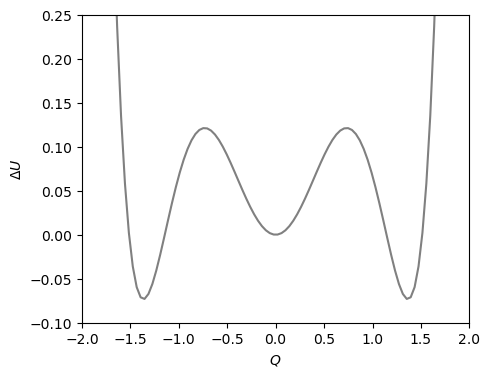

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define potential function
def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# define mesh for plotting
Q_mesh = np.linspace(-2,2,100)
U_mesh = potential_energy(Q_mesh)

# construct figure
plt.figure(figsize=(5, 4))
plt.plot(Q_mesh, U_mesh, color="gray")
plt.xlabel("$Q$")
plt.ylabel("$\Delta U$")
plt.xlim(-2,2)
plt.ylim(-0.1,0.25)
plt.show()

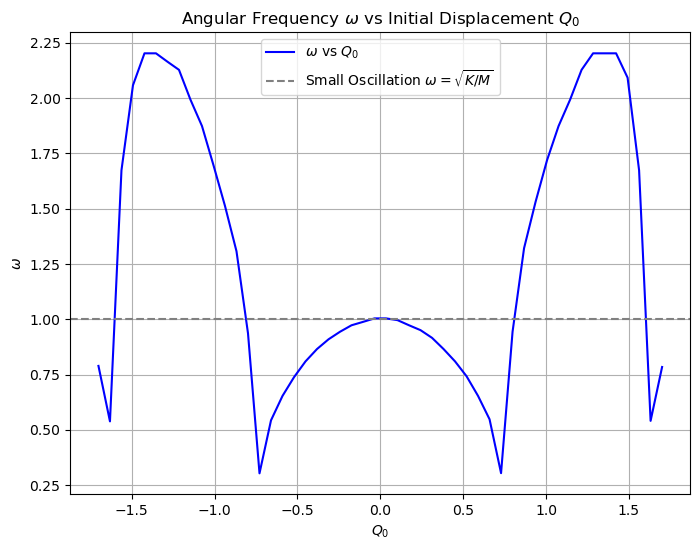

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Step 1: Define the potential energy function
# INPUT: Q (float or array), K (float), D (float), Phi (float)
# OUTPUT: Potential energy \Delta U (float or array)
# TESTS: Q = 0 -> \Delta U = 0; Q = \pm 1 -> Validate manually

def potential_energy(Q, K=1.0, D=2.4, Phi=1.0):
    return (1/2) * K * Q**2 - (1/4) * D * Q**4 + (1/6) * Phi * Q**6

# Step 2: Define the derivative of the potential energy
# INPUT: Q (float or array), K (float), D (float), Phi (float)
# OUTPUT: Force = -\partial U / \partial Q (float or array)
# TESTS: Q = 0 -> Force = 0; Q = \pm 1 -> Validate manually

def force(Q, K=1.0, D=2.4, Phi=1.0):
    return -K * Q + D * Q**3 - Phi * Q**5

# Step 3: Define the equations of motion
# INPUT: t (float), y (list or array), K, D, Phi, M (floats)
# OUTPUT: [dQ/dt, d^2Q/dt^2] (list)
# TESTS: Check dQ/dt matches input velocity; d^2Q/dt^2 matches -Force/M

def equations_of_motion(t, y, K=1.0, D=2.4, Phi=1.0, M=1.0):
    Q, Q_dot = y
    Q_ddot = force(Q, K, D, Phi) / M
    return [Q_dot, Q_ddot]

# Step 4: Solve the equations of motion numerically
# INPUT: Q0, Q_dot0 (floats), t_span (tuple), t_eval (array), K, D, Phi, M
# OUTPUT: t (array), Q(t) (array)
# TESTS: Q0 = 0, Q_dot0 = 0 -> Q(t) = 0 for all t; Q0 = 1 -> Verify oscillation

def solve_motion(Q0, Q_dot0, t_span=(0, 50), t_eval=None, K=1.0, D=2.4, Phi=1.0, M=1.0):
    if t_eval is None:
        t_eval = np.linspace(t_span[0], t_span[1], 1000)
    sol = solve_ivp(
        equations_of_motion, t_span, [Q0, Q_dot0], t_eval=t_eval, args=(K, D, Phi, M)
    )
    return sol.t, sol.y[0]

# Step 5: Extract the oscillation period T
# INPUT: t (array), Q (array)
# OUTPUT: Period T (float)
# TESTS: Sinusoidal data Q(t) -> T matches expected; flat data -> T=None

def extract_period(t, Q):
    peaks = np.where((Q[1:-1] > Q[:-2]) & (Q[1:-1] > Q[2:]))[0] + 1
    if len(peaks) > 1:
        T = t[peaks[1]] - t[peaks[0]]
        return T
    return None

# Step 6: Compute angular frequency \omega for a range of Q0
# INPUT: Q0 (array), K, D, Phi, M (floats)
# OUTPUT: \omega (array)
# TESTS: Q0 = 0 -> \omega = sqrt(K/M); Q0 = \pm 1 -> Finite values

def compute_frequencies(Q0_array, K=1.0, D=2.4, Phi=1.0, M=1.0):
    omega_array = []
    for Q0 in Q0_array:
        t, Q = solve_motion(Q0, 0, t_span=(0, 50))
        T = extract_period(t, Q)
        if T:
            omega_array.append(2 * np.pi / T)
        else:
            omega_array.append(np.sqrt(K / M))  # Small oscillation approximation
    return np.array(omega_array)

# Step 7: Plot \omega vs Q0
# INPUT: Q0, \omega (arrays)
# OUTPUT: Plot
# TESTS: Check plot symmetry around Q0 = 0; Ensure axis labels and grid

Q0_array = np.linspace(-1.7, 1.7, 50)
omega_array = compute_frequencies(Q0_array)

plt.figure(figsize=(8, 6))
plt.plot(Q0_array, omega_array, label="$\\omega$ vs $Q_0$", color="blue")
plt.axhline(np.sqrt(1.0), color="gray", linestyle="--", label="Small Oscillation $\\omega = \\sqrt{K/M}$")
plt.xlabel("$Q_0$")
plt.ylabel("$\\omega$")
plt.title("Angular Frequency $\\omega$ vs Initial Displacement $Q_0$")
plt.legend()
plt.grid()
plt.show()


The anharmonicity of the potential energy causes $\omega$ to decrease as $Q_0$ increases, deviating from the harmonic approximation. This illustrates the nonlinear behavior of the system, where the restoring force and energy landscape differ significantly from those of a purely quadratic potential.